# K-Truss

"The output matrix C is the k-truss subgraph of A.  Its edges are a subset of
A.  Each edge in C is part of at least k-2 triangles in C.  The pattern of C
is the adjacency matrix of the k-truss subgraph of A.  The edge weights of C
are the support of each edge.  That is, C(i,j)=nt if the edge (i,j) is part
of nt triangles in C.  All edges in C have support of at least k-2.  The
total number of triangles in C is sum(C)/6.  The number of edges in C is
nnz(C)/2.  C is returned as symmetric with a zero-free diagonal." - LAGraph_ktruss()

In [1]:
from pygraphblas import *
from pygraphblas.gviz import draw

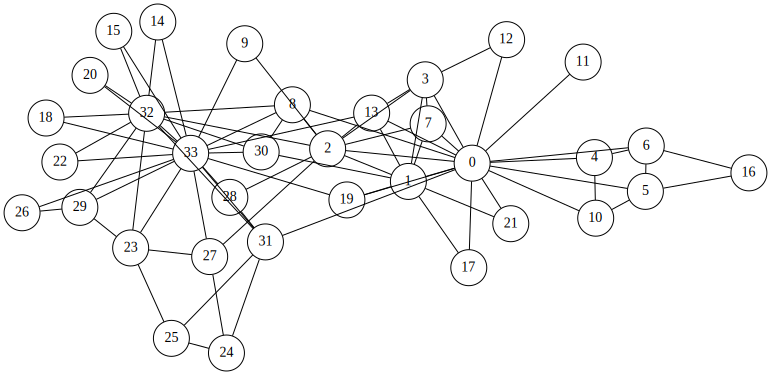

In [7]:
def ktruss(A, k=3):
    assert k >= 3
    Support = Scalar.from_value(k-2)
    last_nz = A.nvals
    while True:
        A = A.mxm(A, semiring=UINT32.PLUS_LAND, mask=A)
        A = A.select('>=', Support)
        if A.nvals == last_nz:
            break
        last_nz = A.nvals
    return A

karate = list(Matrix.ssget('Newman/karate'))[-1][1]

draw(karate, show_weight=False, directed=False, graph_attr=dict(layout='sfdp'))

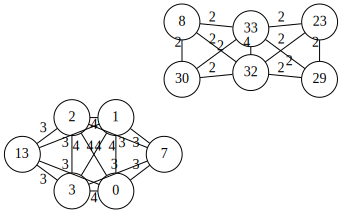

In [13]:
draw(ktruss(karate, 4).select('>', 1), graph_attr=dict(layout='sfdp'), directed=False)